In [44]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### 1 - Verinin elde edilmesi

İlk olarak veriler oluşturulan excel içerisinden okunmalı ve pandas ile dataframe'e aktarılmalıdır. Bunun için pandas kütüphanesi kullanılmaktadır.

In [45]:
df = pd.read_excel('source/leaves.xlsx')
df_clean = df[df['status'].notna()]  # "None" olanları filtrele
df_clean['status'] = df_clean['status'].astype(int)  # Etiketleri tam sayıya çevir

C:\Users\Yasin\AppData\Local\Temp\ipykernel_7552\641972447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = df_clean['status'].astype(int)  # Etiketleri tam sayıya çevir


In [46]:
df

,image_path,filtered_image_path,class,file_name,status
0,leaves/1/image_2024-05-27_16-41-31_0.jpg,processed_images/1/image_2024-05-27_16-41-31_0...,1,image_2024-05-27_16-41-31_0.jpg,1.0
1,leaves/1/image_2024-05-27_16-52-13_0.jpg,processed_images/1/image_2024-05-27_16-52-13_0...,1,image_2024-05-27_16-52-13_0.jpg,1.0
2,leaves/1/image_2024-05-27_17-02-54_0.jpg,processed_images/1/image_2024-05-27_17-02-54_0...,1,image_2024-05-27_17-02-54_0.jpg,1.0
3,leaves/1/image_2024-05-27_17-13-36_0.jpg,processed_images/1/image_2024-05-27_17-13-36_0...,1,image_2024-05-27_17-13-36_0.jpg,1.0
4,leaves/1/image_2024-05-27_17-24-18_0.jpg,processed_images/1/image_2024-05-27_17-24-18_0...,1,image_2024-05-27_17-24-18_0.jpg,1.0
...,...,...,...,...,...
3216,leaves/8/image_2024-06-04_13-57-18_2.jpg,processed_images/8/image_2024-06-04_13-57-18_2...,8,image_2024-06-04_13-57-18_2.jpg,0.0
3217,leaves/8/image_2024-06-04_14-08-01_2.jpg,processed_images/8/image_2024-06-04_14-08-01_2...,8,image_2024-06-04_14-08-01_2.jpg,0.0
3218,leaves/8/image_2024-06-04_14-18-43_2.jpg,processed_images/8/image_2024-06-04_14-18-43_2...,8,image_2024-06-04_14-18-43_2.jpg,0.0
3219,leaves/8/image_2024-06-04_14-29-25_2.jpg,processed_images/8/image_2024-06-04_14-29-25_2...,8,image_2024-06-04_14-29-25_2.jpg,0.0


Dataframe içerisinde (excel dosyasından da incelenebilir) orjinal resim path'i, class'ı, process edilmiş resmin path'i ve el ile işaretleme yapılmış status'u bulunmaktadır. Bu değer bitkide leke varsa 1 yoksa 0 olarak işaretlenmiştir. 

status 1 : Bitki hasta 

status 0 : Bitki sağlıklı 

In [47]:
class_distribution = df_clean['status'].value_counts()
print(f"Sınıf Dağılımı:\n{class_distribution}")

Sınıf Dağılımı:
status
1    2262
0     958
Name: count, dtype: int64


Verilerin train ve test olarak ayrıştırılması için sklearn kütüphanesinden train_test_split fonksiyonu ve GroupShuffleSplit sınıfı kullanılmaktadır. Bu fonksiyon ile veriler %80 train %20 test olacak şekilde ayrıştırılmaktadır.

In [48]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(splitter.split(df_clean, groups=df_clean['class']))

train_df = df_clean.iloc[train_idx]
test_df = df_clean.iloc[test_idx]

In [49]:
test_df

,image_path,filtered_image_path,class,file_name,status
593,leaves/2/image_2024-05-27_16-41-31_3.jpg,processed_images/2/image_2024-05-27_16-41-31_3...,2,image_2024-05-27_16-41-31_3.jpg,0
595,leaves/2/image_2024-05-27_16-52-13_7.jpg,processed_images/2/image_2024-05-27_16-52-13_7...,2,image_2024-05-27_16-52-13_7.jpg,0
596,leaves/2/image_2024-05-27_17-02-54_5.jpg,processed_images/2/image_2024-05-27_17-02-54_5...,2,image_2024-05-27_17-02-54_5.jpg,0
597,leaves/2/image_2024-05-27_17-13-36_5.jpg,processed_images/2/image_2024-05-27_17-13-36_5...,2,image_2024-05-27_17-13-36_5.jpg,0
598,leaves/2/image_2024-05-27_17-24-18_5.jpg,processed_images/2/image_2024-05-27_17-24-18_5...,2,image_2024-05-27_17-24-18_5.jpg,0
...,...,...,...,...,...
2967,leaves/6/image_2024-06-04_14-18-43_4.jpg,processed_images/6/image_2024-06-04_14-18-43_4...,6,image_2024-06-04_14-18-43_4.jpg,0
2968,leaves/6/image_2024-06-04_14-29-25_3.jpg,processed_images/6/image_2024-06-04_14-29-25_3...,6,image_2024-06-04_14-29-25_3.jpg,1
2969,leaves/6/image_2024-06-04_14-29-25_4.jpg,processed_images/6/image_2024-06-04_14-29-25_4...,6,image_2024-06-04_14-29-25_4.jpg,0
2970,leaves/6/image_2024-06-04_14-40-07_3.jpg,processed_images/6/image_2024-06-04_14-40-07_3...,6,image_2024-06-04_14-40-07_3.jpg,0


In [50]:
train_df

,image_path,filtered_image_path,class,file_name,status
0,leaves/1/image_2024-05-27_16-41-31_0.jpg,processed_images/1/image_2024-05-27_16-41-31_0...,1,image_2024-05-27_16-41-31_0.jpg,1
1,leaves/1/image_2024-05-27_16-52-13_0.jpg,processed_images/1/image_2024-05-27_16-52-13_0...,1,image_2024-05-27_16-52-13_0.jpg,1
2,leaves/1/image_2024-05-27_17-02-54_0.jpg,processed_images/1/image_2024-05-27_17-02-54_0...,1,image_2024-05-27_17-02-54_0.jpg,1
3,leaves/1/image_2024-05-27_17-13-36_0.jpg,processed_images/1/image_2024-05-27_17-13-36_0...,1,image_2024-05-27_17-13-36_0.jpg,1
4,leaves/1/image_2024-05-27_17-24-18_0.jpg,processed_images/1/image_2024-05-27_17-24-18_0...,1,image_2024-05-27_17-24-18_0.jpg,1
...,...,...,...,...,...
3216,leaves/8/image_2024-06-04_13-57-18_2.jpg,processed_images/8/image_2024-06-04_13-57-18_2...,8,image_2024-06-04_13-57-18_2.jpg,0
3217,leaves/8/image_2024-06-04_14-08-01_2.jpg,processed_images/8/image_2024-06-04_14-08-01_2...,8,image_2024-06-04_14-08-01_2.jpg,0
3218,leaves/8/image_2024-06-04_14-18-43_2.jpg,processed_images/8/image_2024-06-04_14-18-43_2...,8,image_2024-06-04_14-18-43_2.jpg,0
3219,leaves/8/image_2024-06-04_14-29-25_2.jpg,processed_images/8/image_2024-06-04_14-29-25_2...,8,image_2024-06-04_14-29-25_2.jpg,0


train_test_split fonksiyonu ile veriler ayrıştırılırken, GroupShuffleSplit sınıfı ile de gruplar arasında karışıklık olmaması sağlanmaktadır. Ayrıca train içerisinden 0.1 oranında bir validation seti oluşturulmaktadır. Bu validation seti, modelin eğitim sürecinde modelin performansını değerlendirmek için kullanılmaktadır.

In [51]:
# Train'den validation ayır
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(
    train_df, 
    test_size=0.1, 
    stratify=train_df['status'],  # Sınıf dağılımını koru
    random_state=42
)

## 2- Verinin ön işlenmesi ve formatlanması

Train, validation ve test veri setleri oluşturulurken:

- **Shuffle:** Veriler karıştırılarak modelin genelleme yeteneği artırılır.
- **TensorFlow Dataset:** DataFrame'deki `image_path` ve `status` kullanılarak `tf.data.Dataset` yapısı oluşturulur.
- **Map & Batch:** `load_and_preprocess_image` fonksiyonu ile ön işleme uygulanır, veriler batch'lere ayrılır.
- **Prefetch:** Eğitim sırasında I/O darboğazlarını azaltmak için veriler önceden yüklenir.


In [52]:

def load_and_preprocess_image(path, target_size=(224, 224)):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, target_size)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)  
    return img

def create_dataset(df, batch_size=32, shuffle=False):
    paths = df['image_path'].values  
    labels = df['status'].values
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    dataset = dataset.map(
        lambda x, y: (load_and_preprocess_image(x), tf.squeeze(y)),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

batch_size = 32
train_dataset = create_dataset(train_df, batch_size, shuffle=True)
val_dataset = create_dataset(val_df, batch_size)
test_dataset = create_dataset(test_df, batch_size)

In [53]:
import numpy as np
print("Unique labels in train_df:", np.unique(train_df['status']))  # [0, 1] çıkmalı

Unique labels in train_df: [0 1]


In [54]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Augmentation 

augmentation işlemleri ile veri artırma yapıldı.
Bu işlemler, modelin genelleme yeteneğini artırmak için kullanılır. Veri artırma işlemleri arasında:

In [55]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)
])

# Model içine entegre etmek için:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = augmentation(inputs)

## Model - Hybrid AlexNet with VGG (AgroAVNET)

Seçilen model AgroAVNET, AlexNet ve VGG mimarilerinin birleşimidir. Bu model, bitki hastalıklarını sınıflandırmak için tasarlanmıştır. Modelin mimarisi, derin öğrenme alanında yaygın olarak kullanılan iki güçlü mimari olan AlexNet ve VGG'nin özelliklerini birleştirir. 

Makale ilk olarak 2018 yılında Chavan ve Nandedkar tarafından "AgroAVNET for crops and weeds classification: A step forward in automatic farming" çalışmasında önerilmiştir. (Detay için bkz:[Makale](https://www.sciencedirect.com/science/article/pii/S0168169918305532) )


Modelin mimarisi, aşağıdaki katmanları içerir:
- **Convolutional Layers:** Görüntü verilerini işlemek için kullanılır. Bu katmanlar, görüntülerdeki özellikleri öğrenir.
- - **Batch Normalization:** Modelin eğitim sürecini hızlandırmak ve daha iyi sonuçlar elde etmek için kullanılır. Bu katmanlar, modelin öğrenme sürecini stabilize eder.
- **Pooling Layers:** Özellik haritalarını boyutlandırmak ve önemli bilgileri korumak için kullanılır. Bu katmanlar, modelin hesaplama yükünü azaltır.
- **Fully Connected Layers:** Sonuçları sınıflandırmak için kullanılır. Bu katmanlar, modelin öğrenilen özellikleri kullanarak bitki hastalıklarını sınıflandırmasını sağlar.
- **Dropout Layers:** Aşırı öğrenmeyi önlemek için kullanılır. Bu katmanlar, modelin genelleme yeteneğini artırır.
- **Activation Functions:** Modelin öğrenme sürecini yönlendirmek için kullanılır. Bu katmanlar, modelin öğrenme sürecini hızlandırır ve daha iyi sonuçlar elde edilmesini sağlar.
- **Output Layer:** Modelin çıktısını verir. Bu katman, modelin bitki hastalıklarını sınıflandırmasını sağlar.

In [56]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def AgroAVNET(input_shape=(224, 224, 3)):
    # Giriş Katmanı
    inputs = layers.Input(shape=input_shape)

    # AlexNet'ten Esinlenen Bölüm
    # 1. Konvolüsyon + MaxPooling
    x = layers.Conv2D(96, (11, 11), strides=4, padding='valid', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)  # Normalizasyon
    x = layers.MaxPooling2D((3, 3), strides=2)(x)

    # 2. Konvolüsyon + MaxPooling
    x = layers.Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3, 3), strides=2)(x)

    # VGG-16'dan Esinlenen Bölüm
    # 3x Konvolüsyon + MaxPooling
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=2)(x)

    # Tam Bağlı Katmanlar (AlexNet + VGG Hibrit)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Çıkış Katmanı
    outputs = layers.Dense(1, activation='sigmoid')(x)

    return Model(inputs, outputs)

# Modeli Oluştur
model = AgroAVNET(input_shape=(224, 224, 3))
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Ba  (None, 54, 54, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Ba  (None, 26, 26, 256)       1024

In [57]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

Test sonuçları için loss ve accuracy değerleri hesaplandı. 

In [58]:
loss, accuracy, auc = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test AUC: {auc:.3f}")

29/29 [==============================] - 14s 470ms/step - loss: 0.6913 - accuracy: 0.7087 - auc: 0.3998
Test Accuracy: 70.87%
Test AUC: 0.400


29/29 [==============================] - 14s 462ms/step


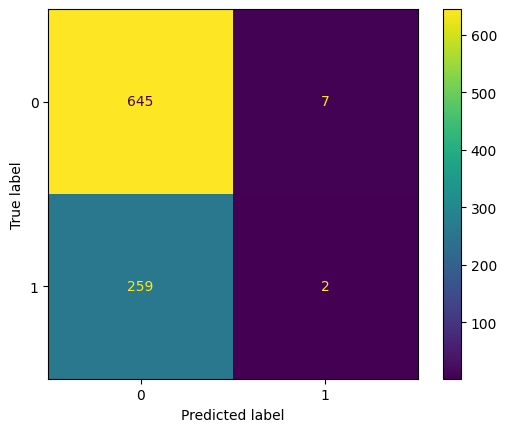

In [59]:
y_pred = model.predict(test_dataset).round().astype(int)
y_true = test_df['status'].values

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['Healthy', 'Diseased'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.71      0.99      0.83       652
    Diseased       0.22      0.01      0.01       261

    accuracy                           0.71       913
   macro avg       0.47      0.50      0.42       913
weighted avg       0.57      0.71      0.60       913

